# Per-token metrics

## Change-one grid search examination

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
# %matplotlib notebook
import pandas as pd
import numpy as np
from pathlib import Path
data_folder = Path('../../data')
df = pd.read_csv(data_folder / 'experiments/best_model_comparison2.csv', index_col=0)
df.head()

,loss,avs_dist,avs_l1,avs_l2,acc,perplexity,top5_acc,history,elapsed,config
best_model_comparison2,,,,,,,,,,
baseline,2.922262,0.555892,0.231910,0.137884,0.332048,19.371548,0.638555,"{'loss': [4.912832736968994, 4.425121784210205...",1173.869907,Config(audio_processing=AudioProcessingConfig(...
DDC,2.712395,0.539461,0.224185,0.132712,0.351711,16.017336,0.669090,"{'loss': [4.77817964553833, 4.135108470916748,...",662.858902,Config(audio_processing=AudioProcessingConfig(...
Custom vec+id:id,5.706663,0.524830,0.218787,0.129822,0.369083,23.839785,0.685781,"{'loss': [6.570437431335449, 6.166257858276367...",847.529622,Config(audio_processing=AudioProcessingConfig(...
Custom vec+id:id,5.724463,0.526978,0.219517,0.130294,0.367316,25.449701,0.683272,"{'loss': [6.634748458862305, 6.105906963348389...",1083.473060,Config(audio_processing=AudioProcessingConfig(...
MLSTM,3.626963,0.522084,0.217321,0.128820,0.371808,14.868427,0.691659,"{'loss': [5.898534774780273, 4.466647624969482...",1543.521549,Config(audio_processing=AudioProcessingConfig(...


In [2]:
def get_stats(df):
    ser = pd.Series()
    for col in df.select_dtypes(include=np.number).columns:
        ser[f'{col}_mean'] = df[col].mean()
        ser[f'{col}_std'] = df[col].std()
    return ser
    
res = df.groupby(df.index).apply(get_stats)
res.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,loss_mean,loss_std,avs_dist_mean,avs_dist_std,avs_l1_mean,avs_l1_std,avs_l2_mean,avs_l2_std,acc_mean,acc_std,perplexity_mean,perplexity_std,top5_acc_mean,top5_acc_std,elapsed_mean,elapsed_std
best_model_comparison2,,,,,,,,,,,,,,,,
Custom vec+id:id,5.709885,0.006998,0.524287,0.001309,0.218630,0.000550,0.129800,0.000397,0.370124,0.001502,24.447216,0.534579,0.685613,0.001439,970.385211,63.199645
Custom vec+id:vec,0.058029,0.000665,0.308366,0.003225,0.171866,0.002081,0.058029,0.000665,0.328846,0.007536,inf,NaN,0.563575,0.006448,1426.884825,46.680319
DDC,2.727013,0.019819,0.540840,0.001041,0.225111,0.000501,0.133538,0.000398,0.350429,0.001372,16.275832,0.354383,0.667677,0.001800,705.241020,49.188943


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


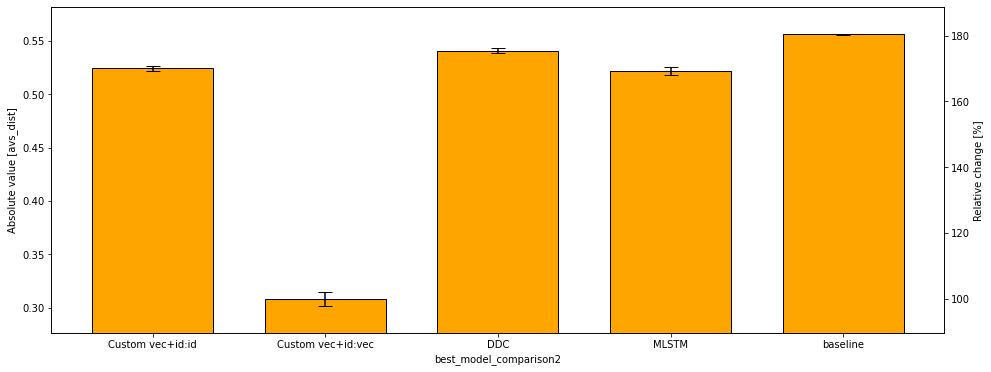

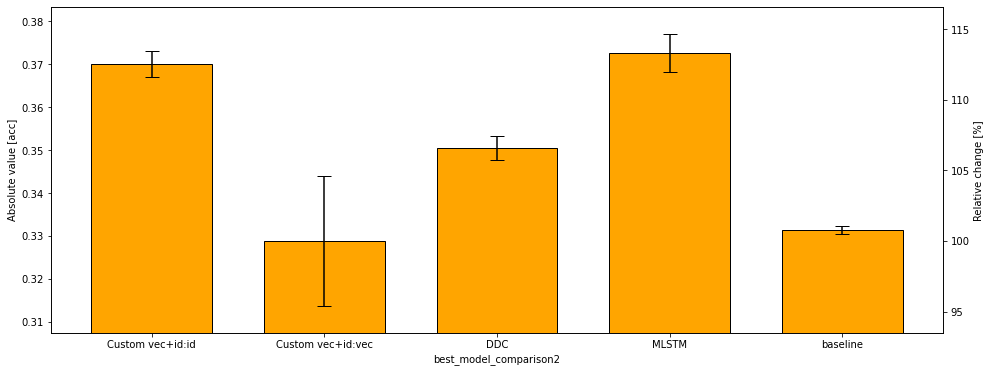

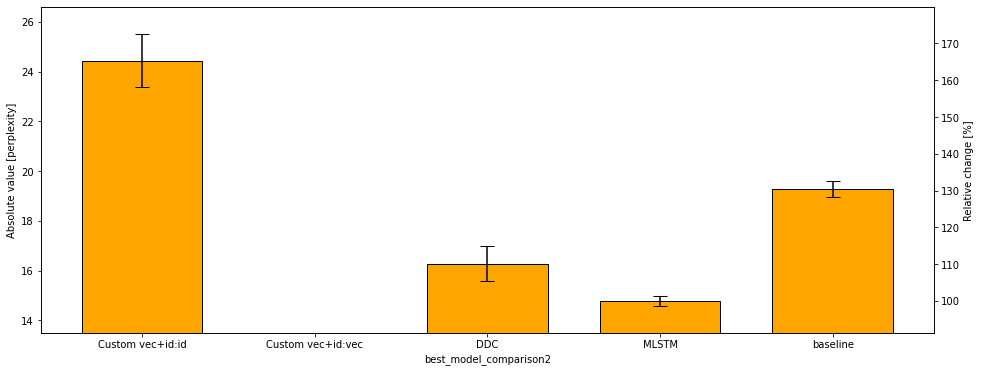

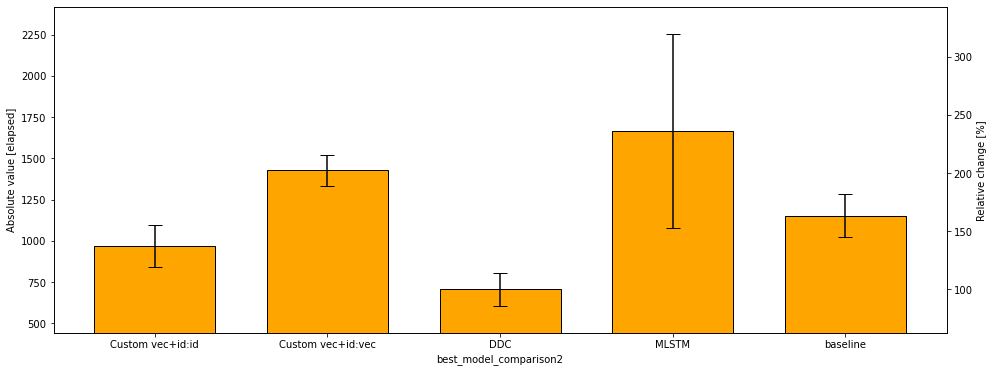

In [3]:
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import re
import math

    
def plot_col(df, col, ylabel='', name=''):
    barWidth = 0.7
    mean = df[f'{col}_mean']
    norm_mean = mean / mean.min()
    yer = df[f'{col}_std'] * 2
    yer = yer.fillna(0)

    # The x position of bars
    x_pos = np.arange(len(mean))
    bot, top = (mean - yer).min(), (mean + yer).max()
    padding = (top - bot) * 0.1
    bot, top = bot - padding, top + padding
    
    
    fig = plt.figure(None, figsize=(16, 6,))
    
    ax = fig.add_subplot(1, 1, 1)
    
    # Create bars
    ax.bar(x_pos, mean, width = barWidth, color = 'orange', edgecolor = 'black', yerr=yer, capsize=7, label=f'{col}')

    # General layout
    ax.set_xticks([x for x in range(len(mean))]) # , df.index
#     ax.set_xticklabels([',\n'.join(str(x).split(',')) for x in df.index])
    ax.set_xticklabels([re.sub("['\[\]()]", '',
        re.sub(',', '\n', str(x))) for x in df.index])
    ax.set_xlabel(df.index.name)
    ax.set_ylabel(ylabel)
    ax.set_ylim(bot, top)
    ax.set_ylabel(f'Absolute value [{col}]')
    ax.set_title(name)
    
    ax2 = ax.twinx()

    ax2.set_ylabel('Relative change [%]')

    ax2.set_ylim(bot / mean.min() * 100, top / mean.min() * 100)
    
#     fig.legend()
    fig.show()

def plot_cols(df, cols, name=''):
#     display(Markdown(f'## {df.index.name}'))
    groupped_df = df.groupby(df.index).apply(get_stats)
    groupped_df[~groupped_df.applymap(lambda x: math.isfinite(x))] = None  # drop Nan, inf, etc.
    for col in cols:
        if col in df.columns:
            plot_col(groupped_df, col, name=name)


plot_cols(df, ['avs_dist', 'accuracy', 'acc', 'perplexity', 'elapsed'])

6.00 runs per hyperparam option   dense_repetition_tapering.csv


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


7.60 runs per hyperparam option      best_model_comparison2.csv
7.00 runs per hyperparam option   vecinformation_comparison.csv
6.29 runs per hyperparam option       best_model_comparison.csv
7.00 runs per hyperparam option              cnn_repetition.csv
7.00 runs per hyperparam option                     dropout.csv
1.43 runs per hyperparam option         baseline_model_size.csv
7.00 runs per hyperparam option                  model_size.csv
3.25 runs per hyperparam option      information_comparison.csv


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


3.00 runs per hyperparam option label_smoothing:mixup_alpha.csv
7.71 runs per hyperparam option                    x_groups.csv
3.00 runs per hyperparam option             label_smoothing.csv
7.00 runs per hyperparam option             lstm_repetition.csv
3.00 runs per hyperparam option                 mixup_alpha.csv
7.00 runs per hyperparam option            dense_repetition.csv
4.50 runs per hyperparam option   id_information_comparison.csv
7.70 runs per hyperparam option     information_comparison2.csv
1.71 runs per hyperparam option    baseline_model_size_fail.csv


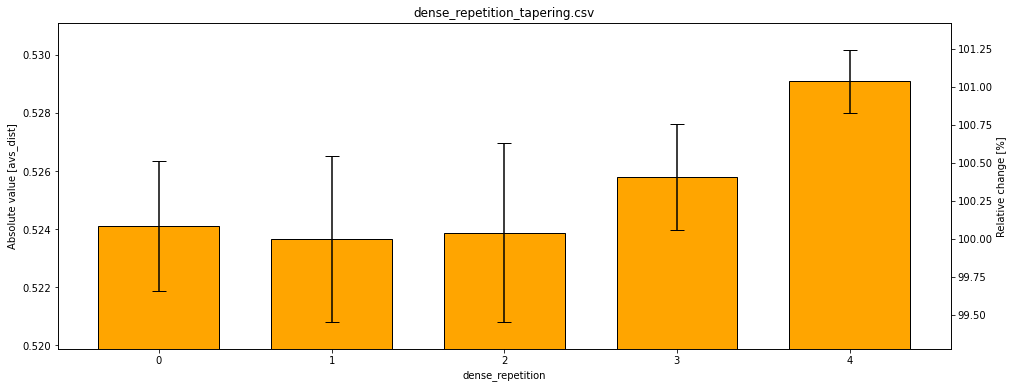

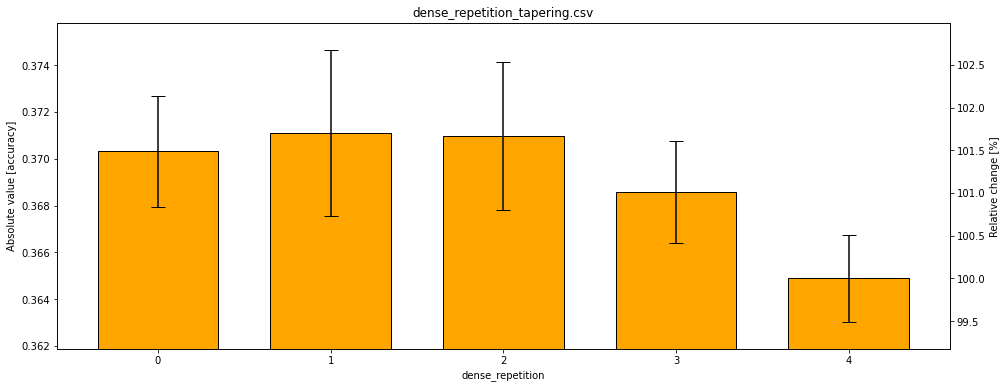

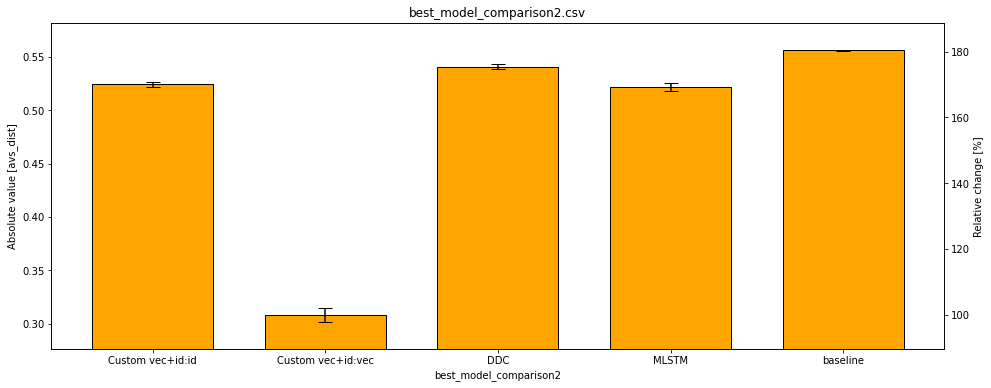

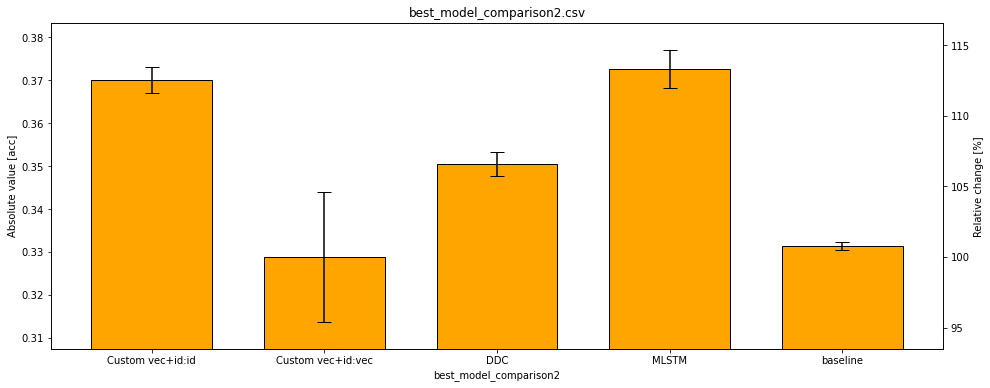

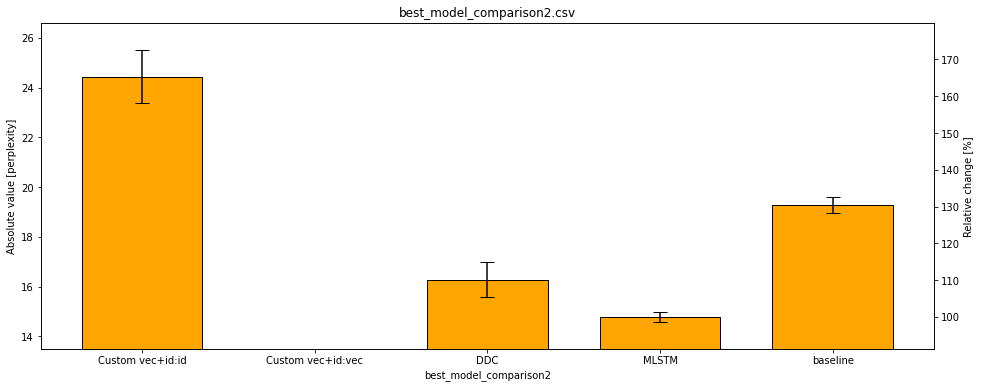

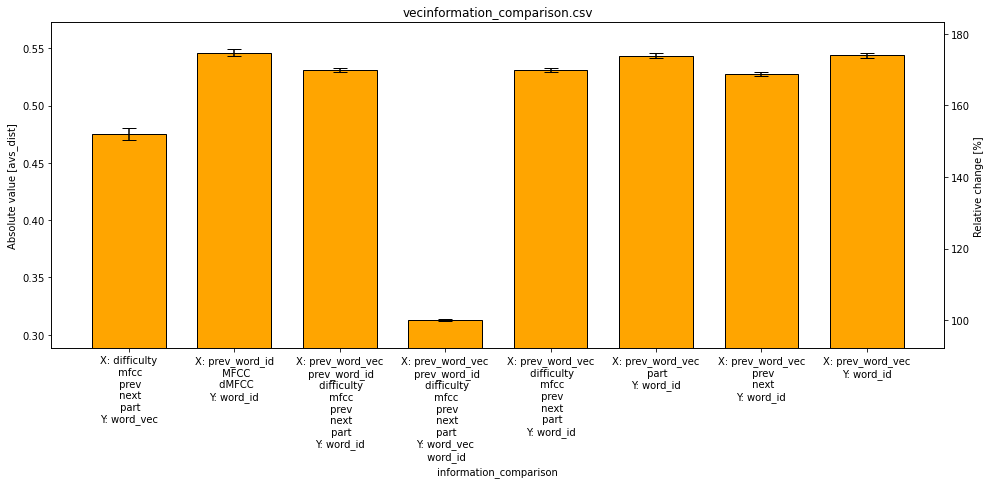

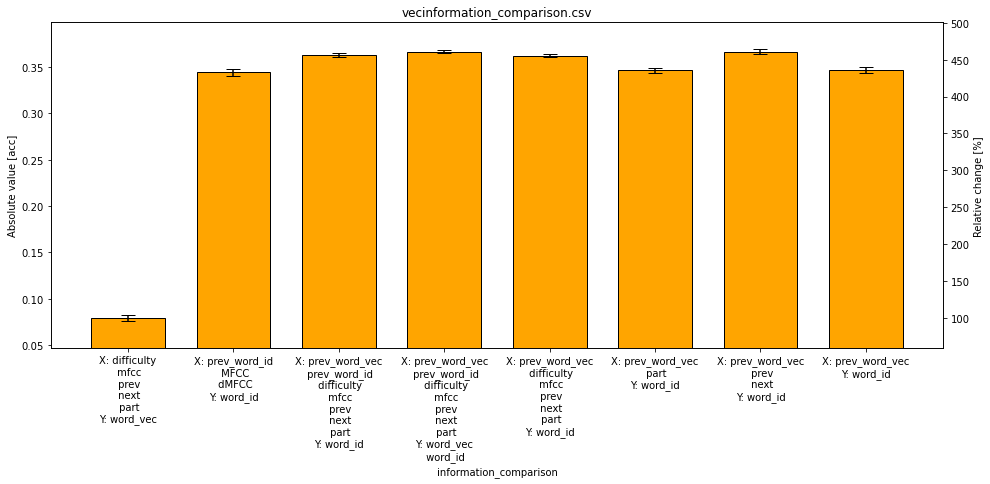

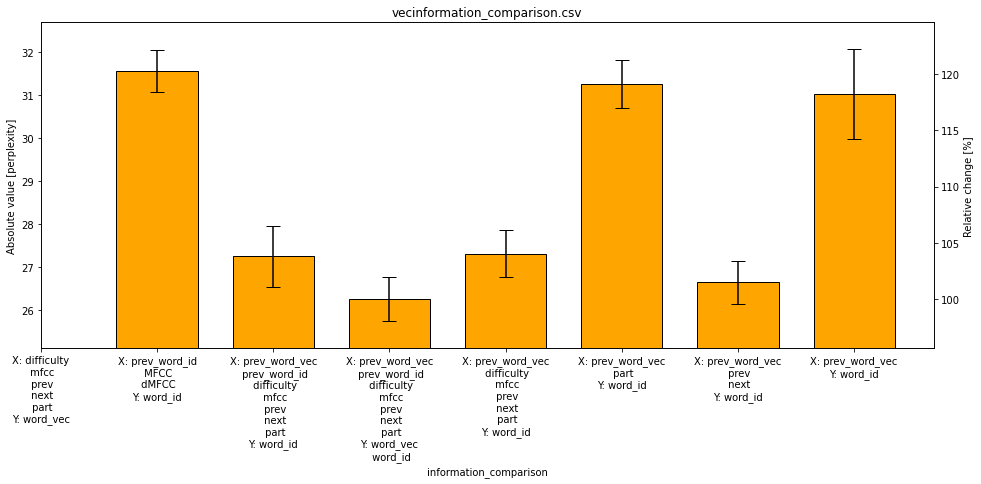

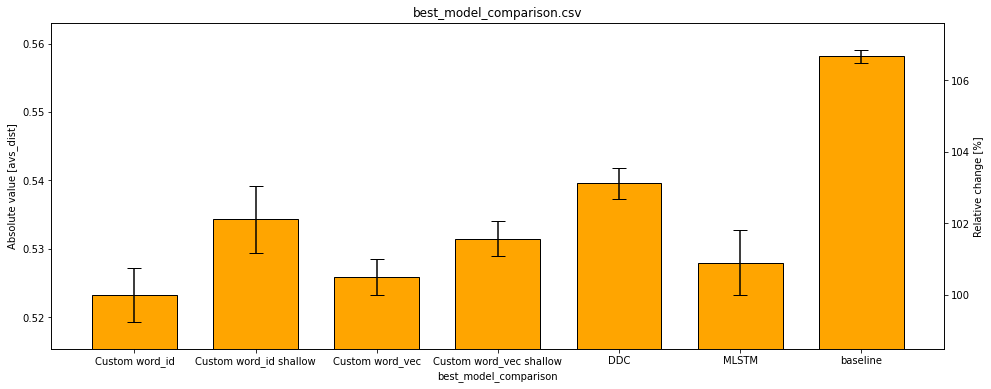

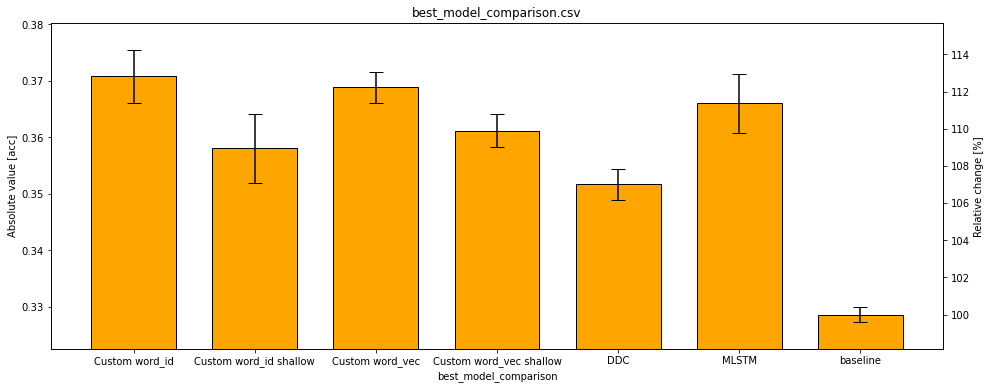

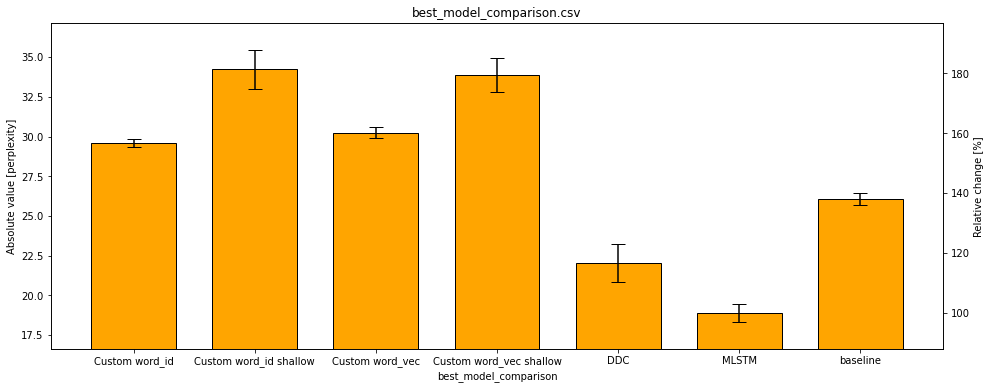

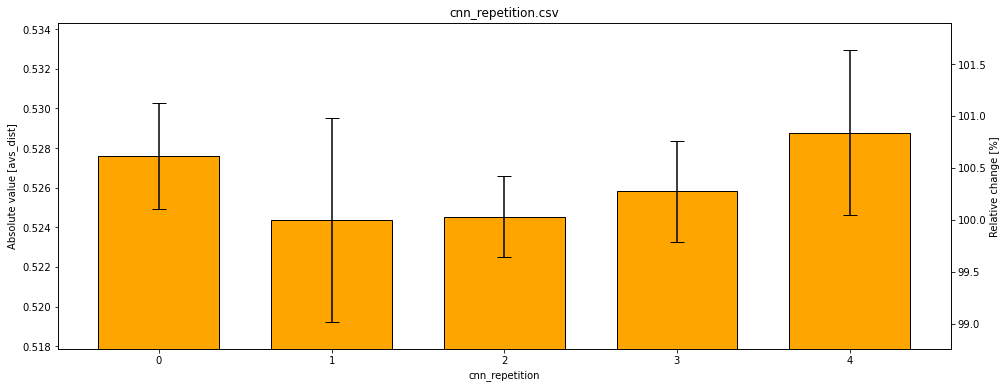

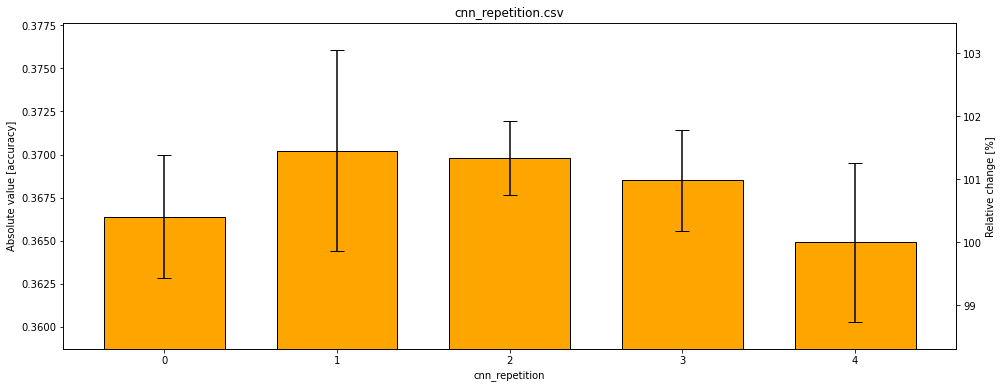

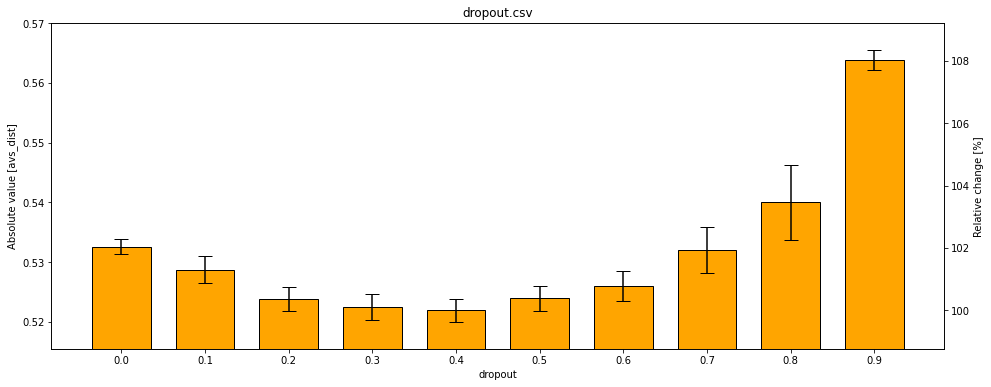

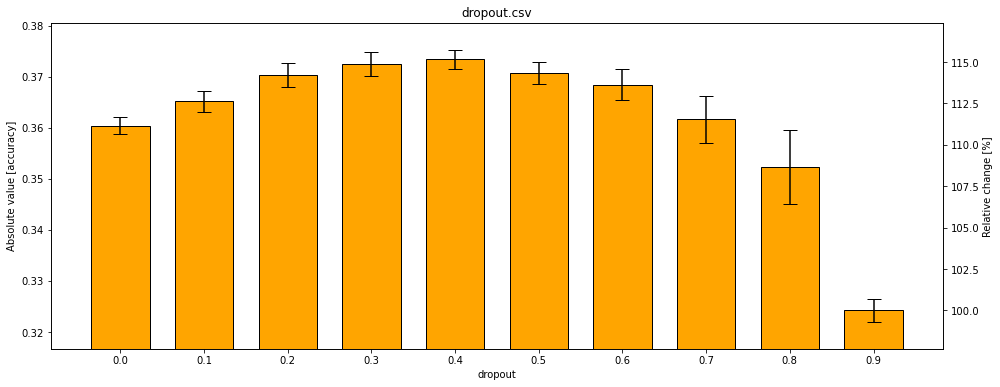

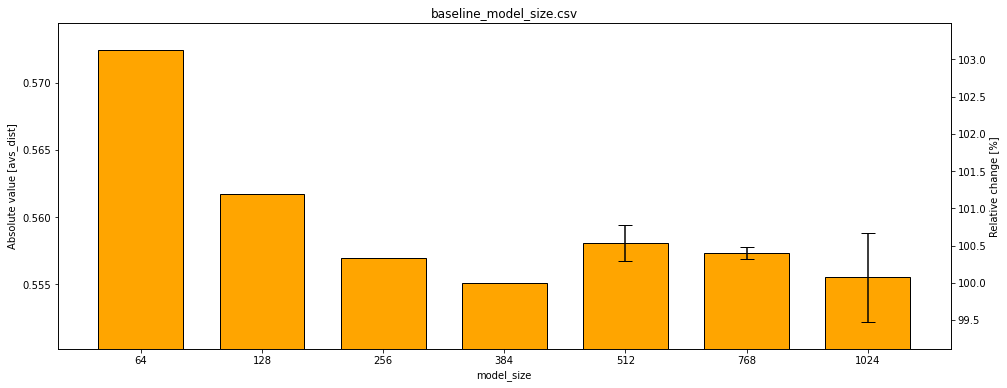

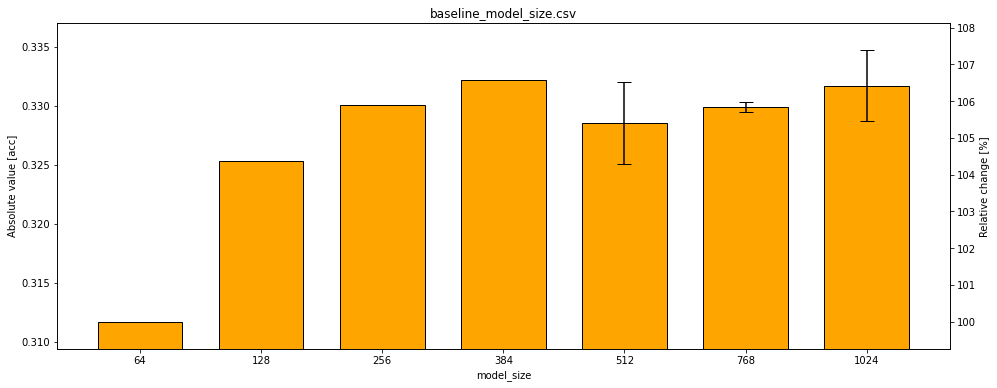

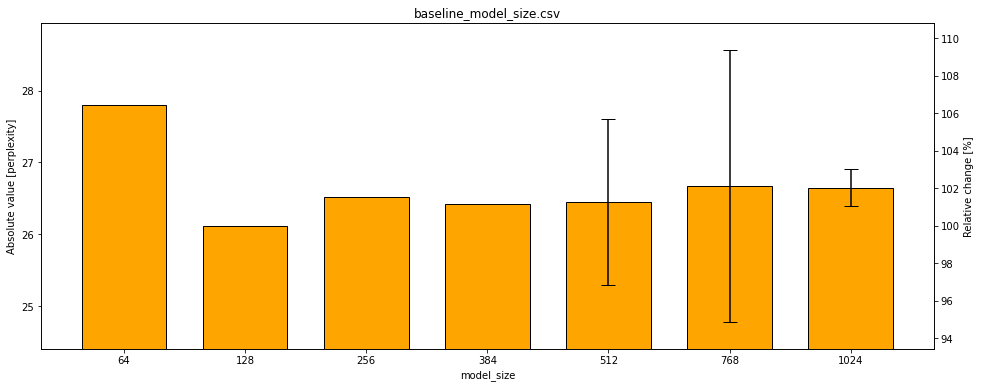

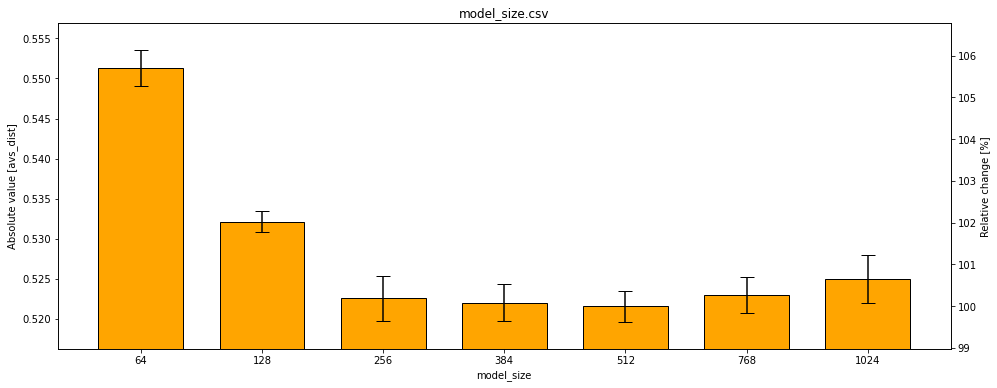

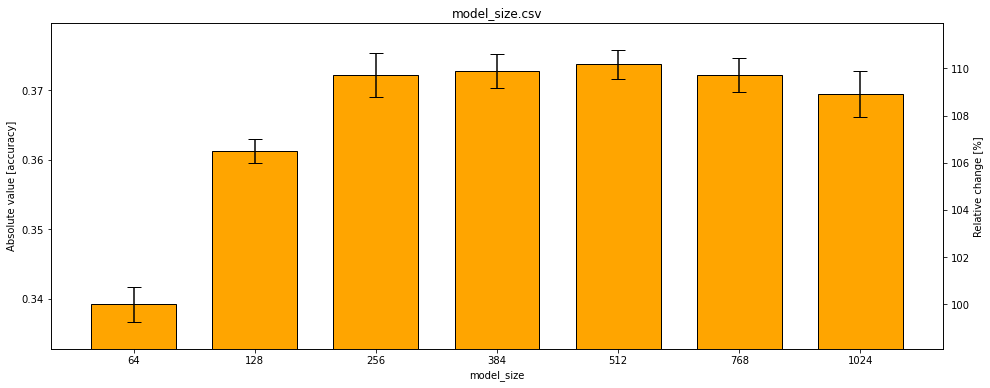

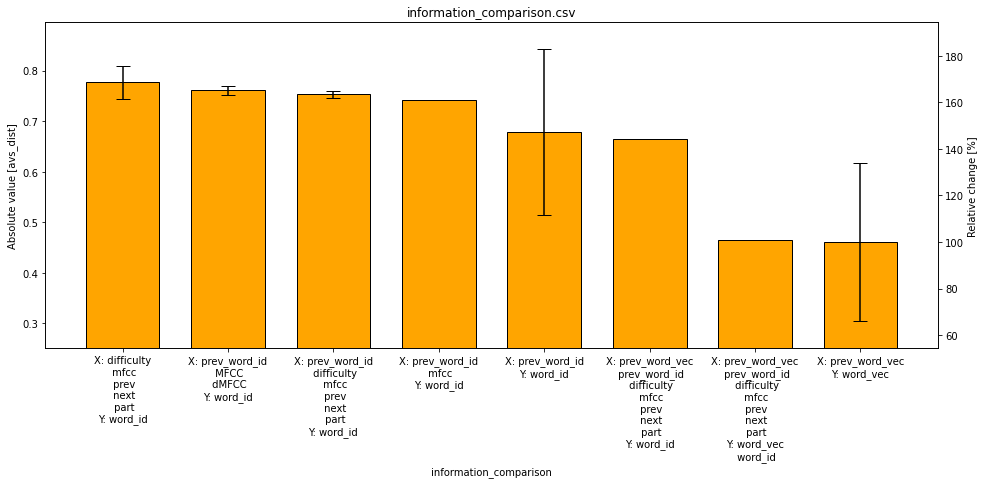

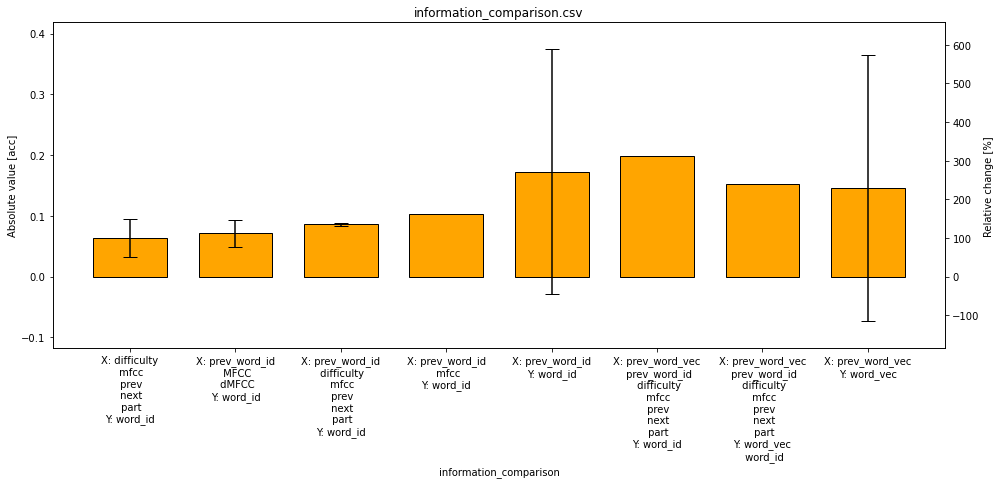

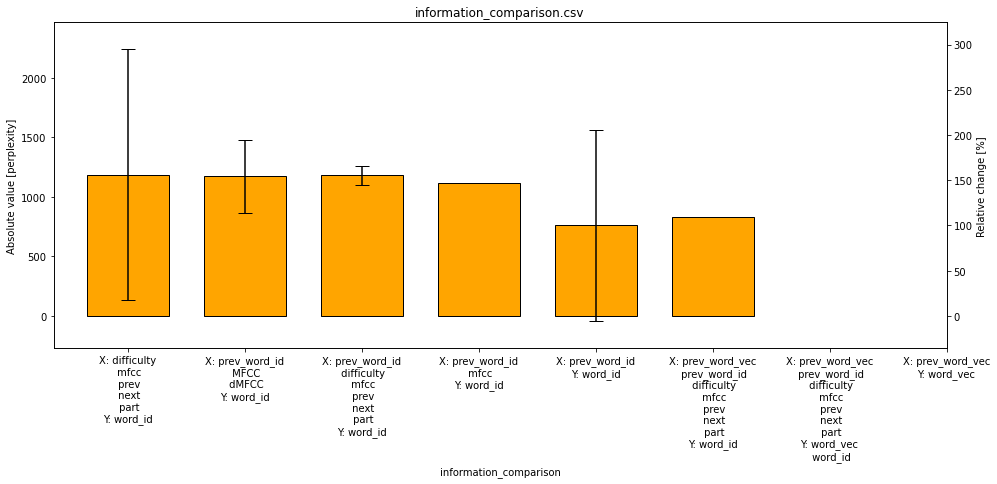

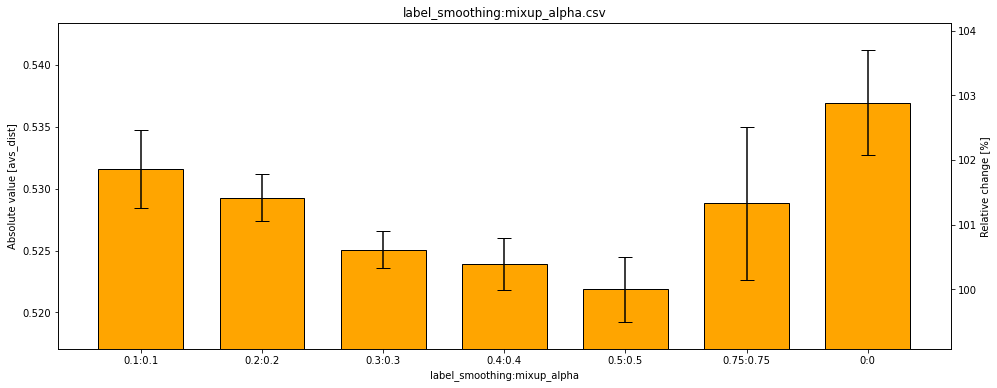

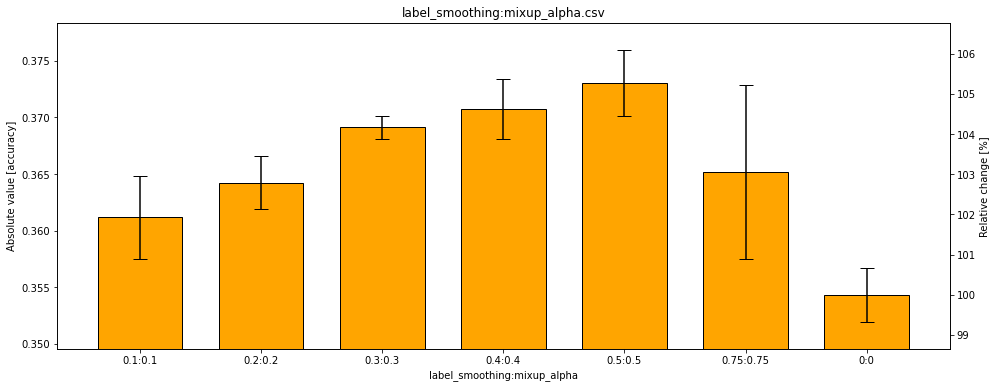

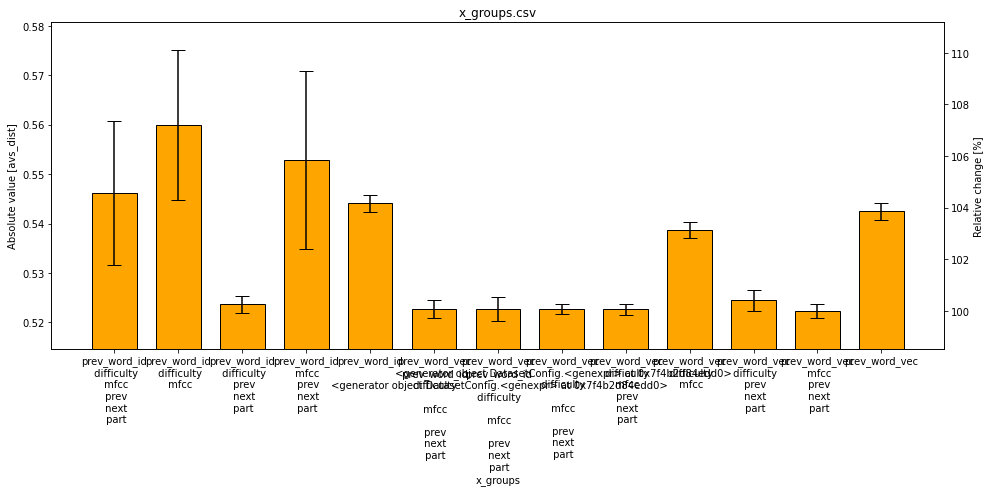

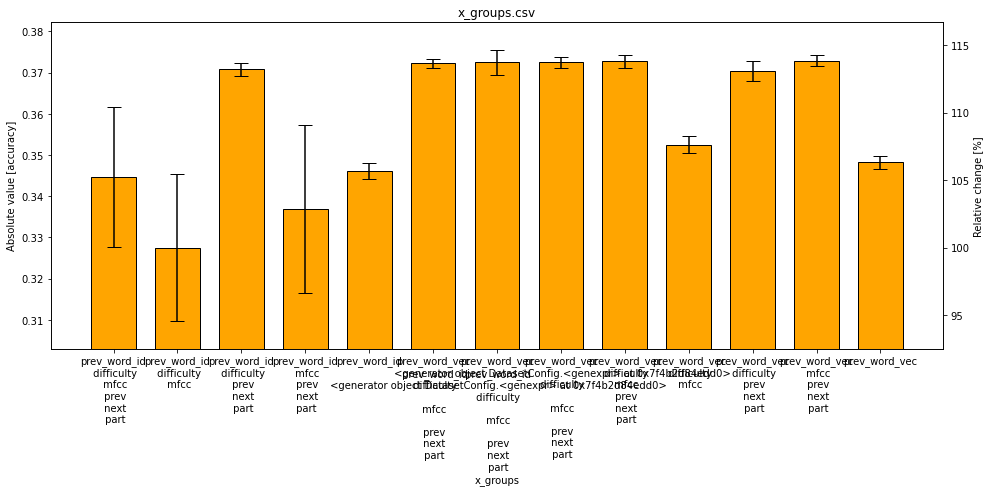

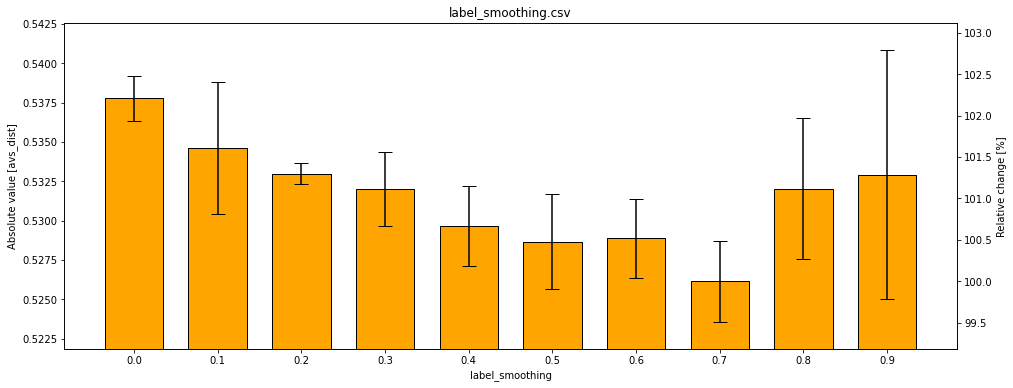

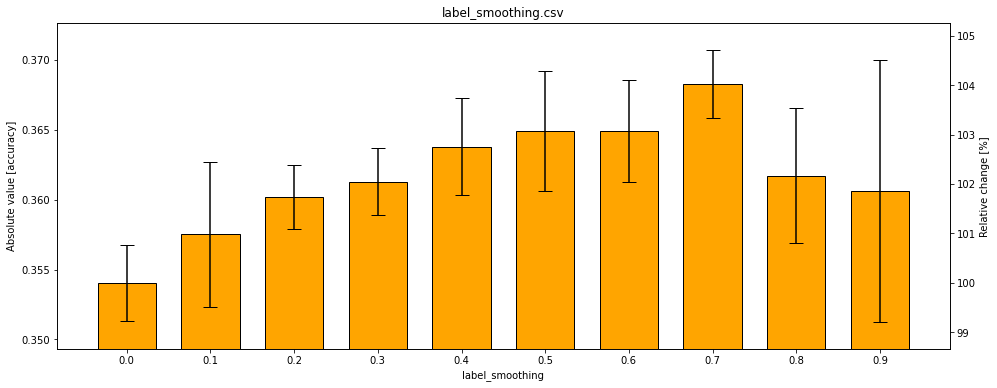

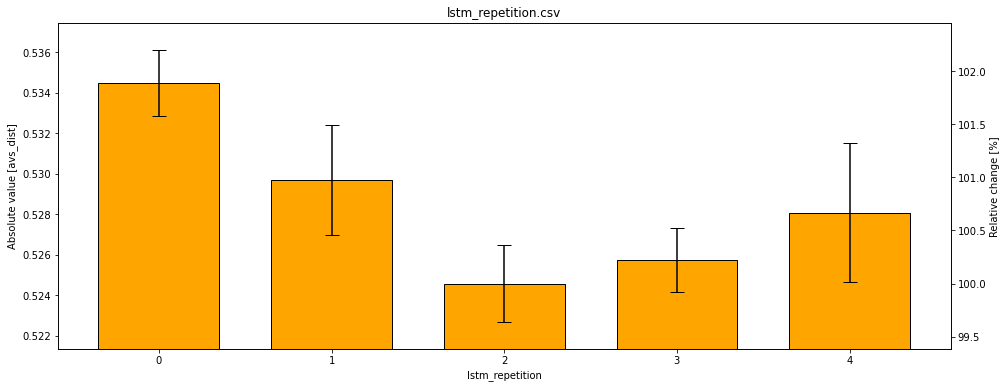

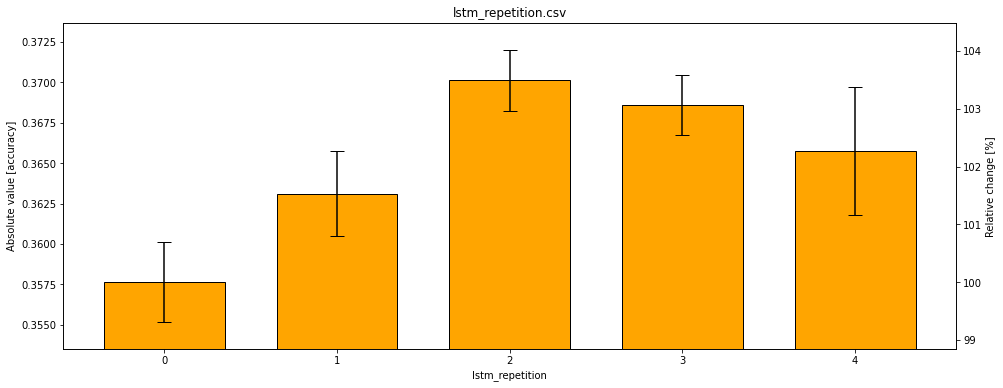

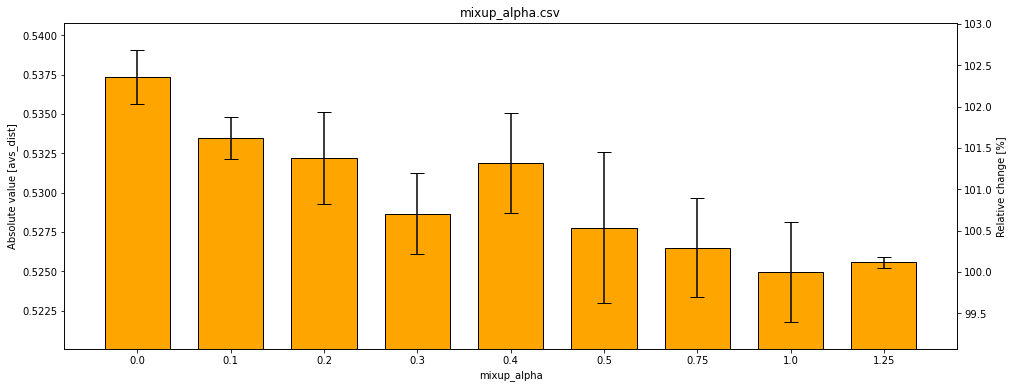

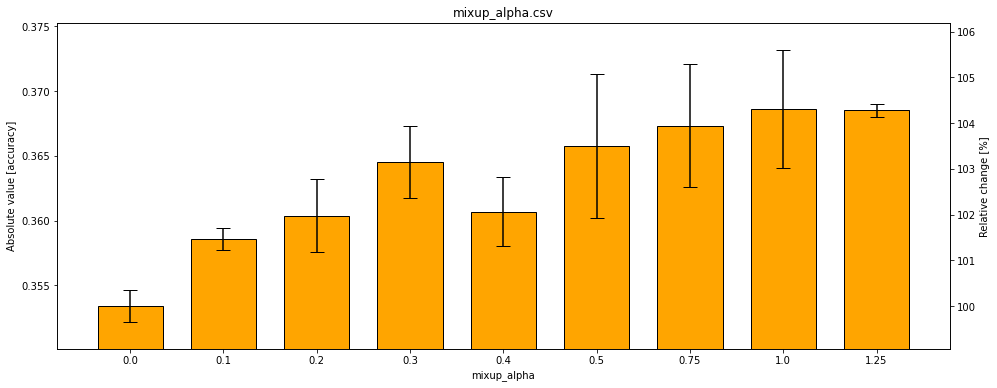

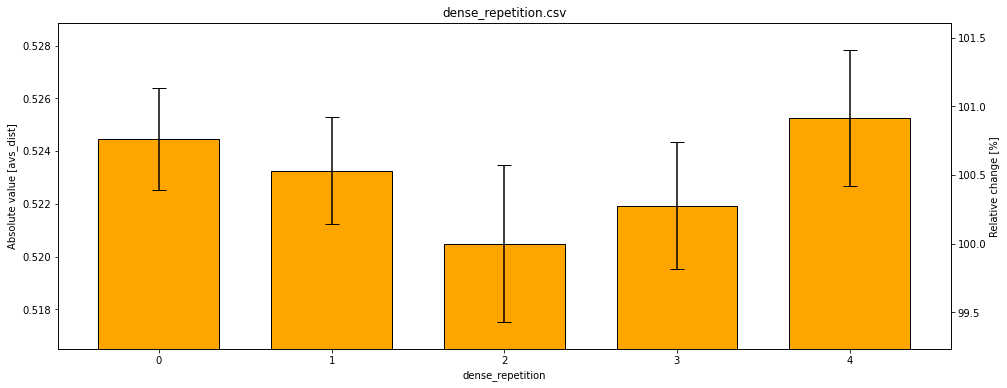

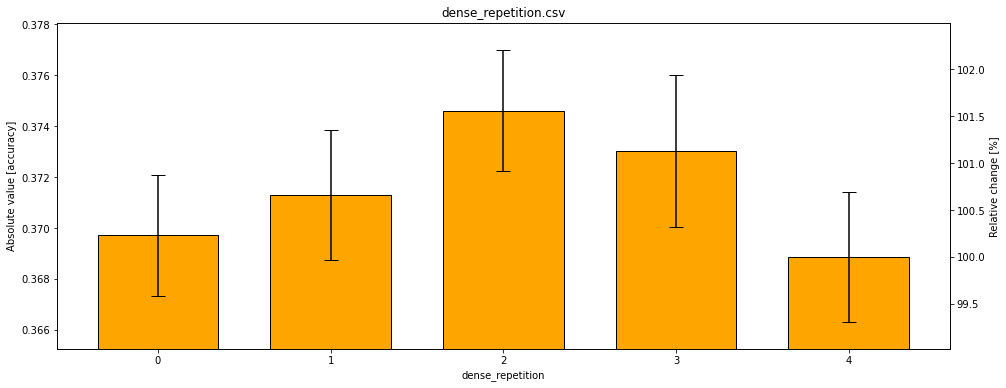

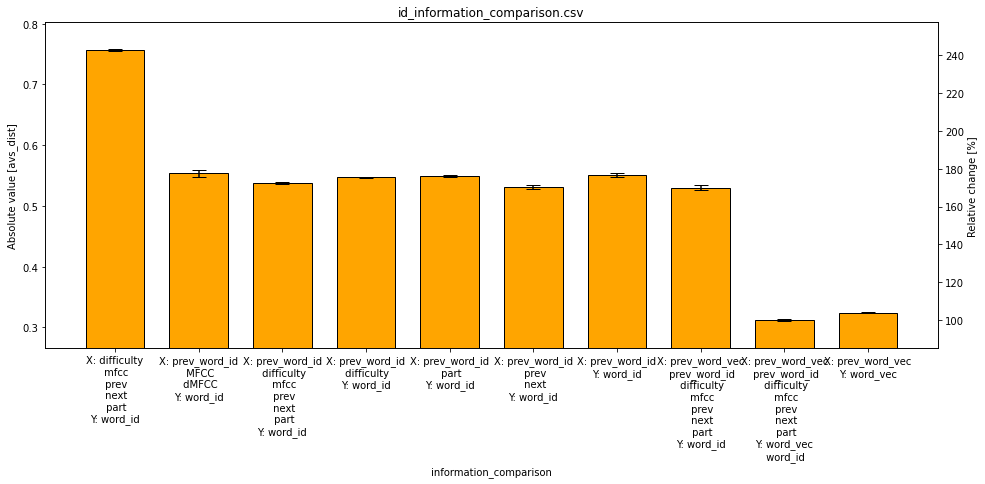

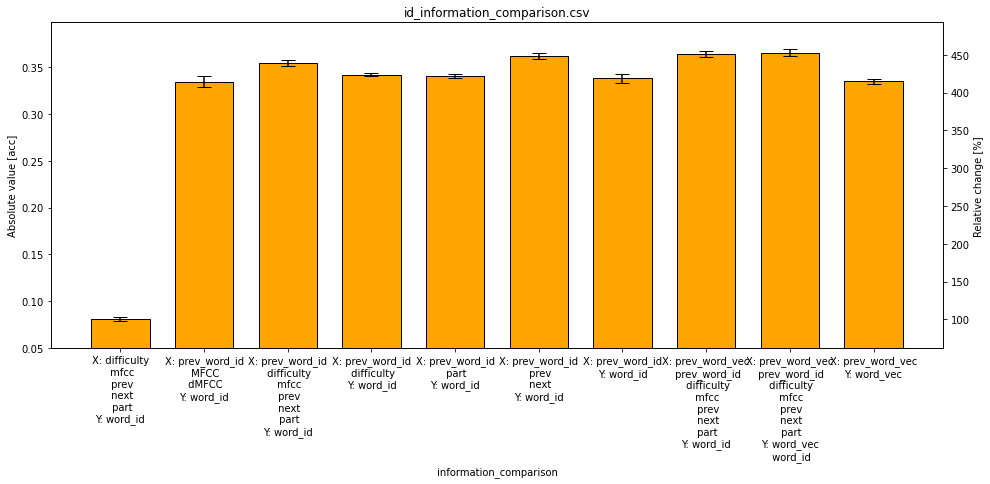

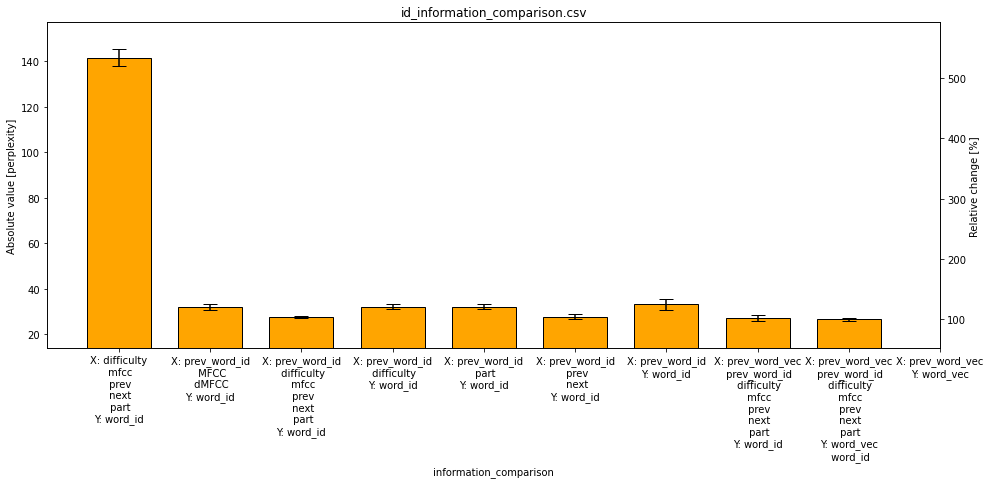

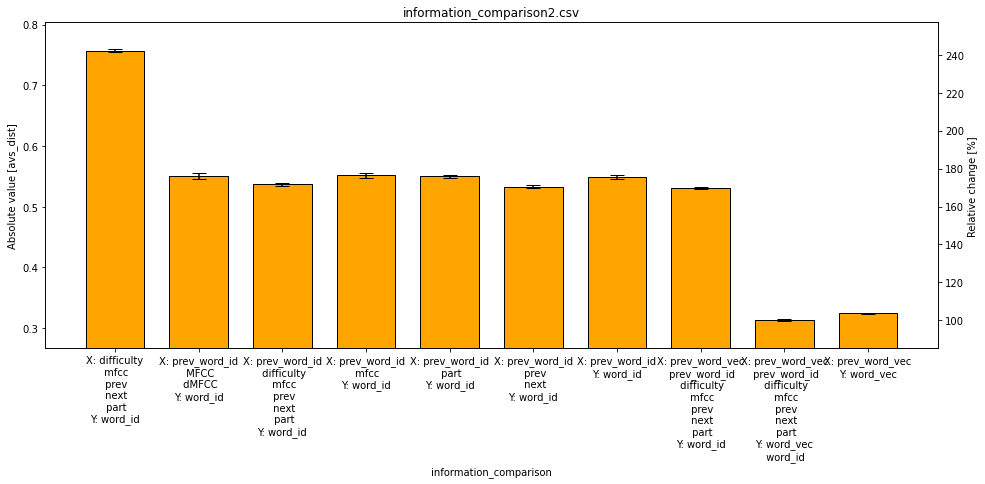

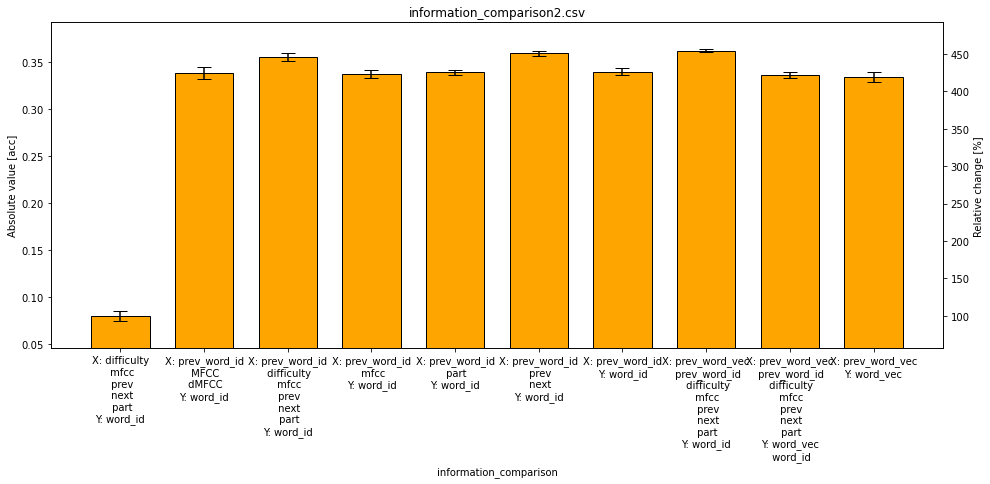

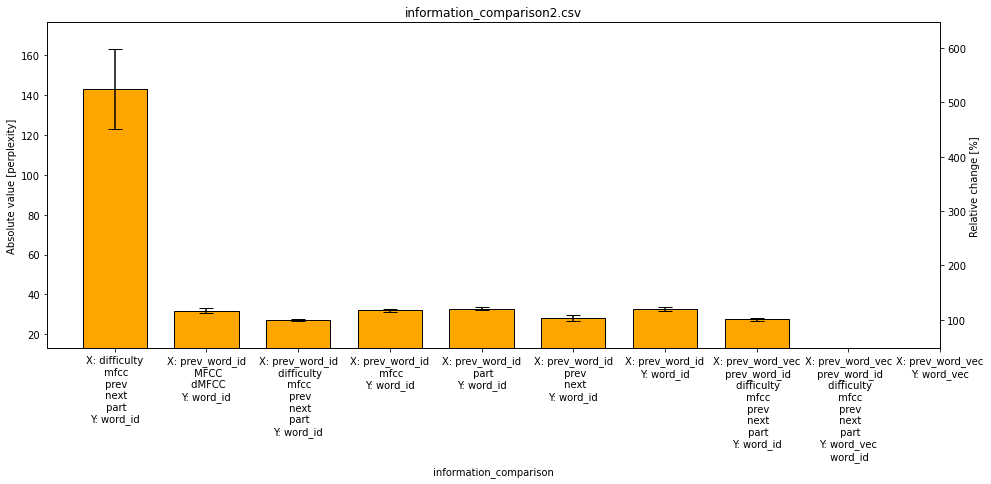

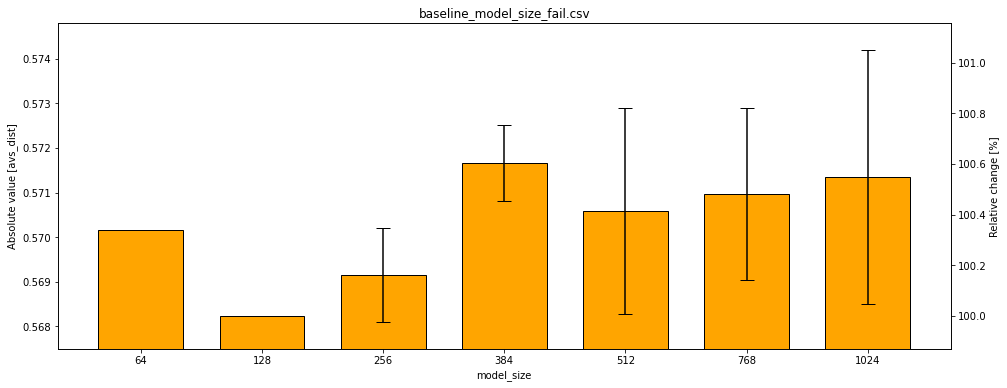

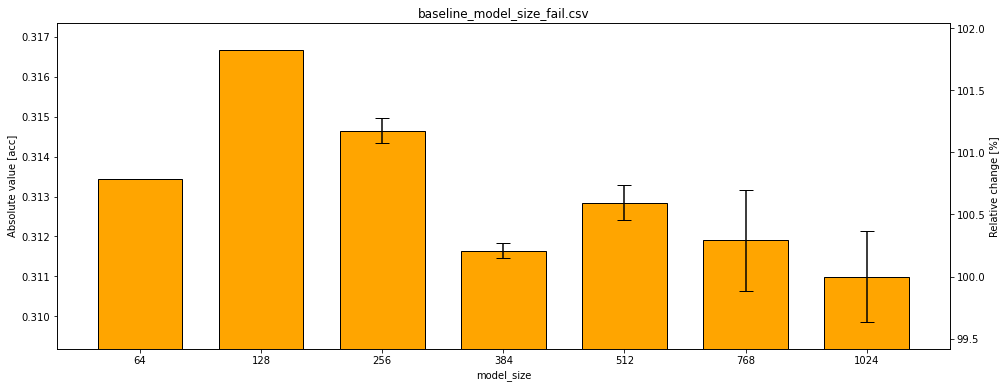

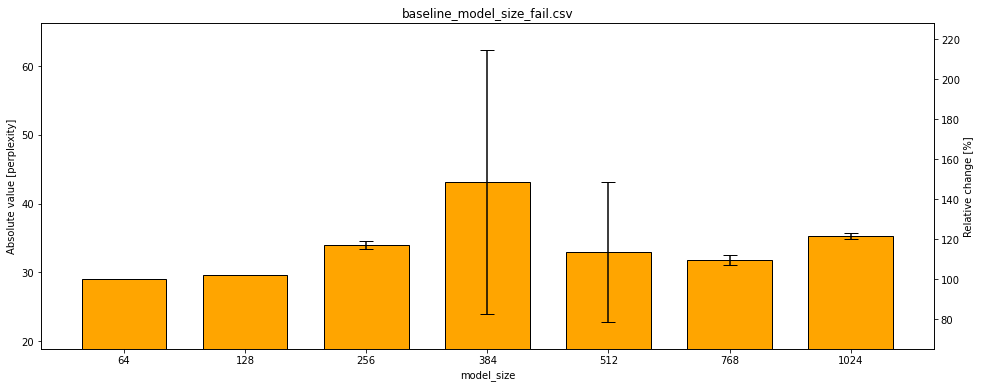

In [4]:
from pathlib import Path

experiments_path = data_folder / 'experiments'
for path in experiments_path.iterdir():
    if path.is_file() and path.suffix == '.csv':
        df = pd.read_csv(path, index_col=0)
        print(f'{len(df) / len(df.index.unique()):2.2f} runs per hyperparam option {str(path.name):>31}')
        plot_cols(df, ['avs_dist', 'accuracy', 'acc', 'perplexity'], path.name)

## Table comparison
Ready to be copied to the thesis!
### Models comparison

In [10]:
df = pd.read_csv(data_folder / 'experiments/best_model_comparison2.csv', index_col=0)
df['acc'] *= 100
df['top5_acc'] *= 100
res = df.groupby(df.index).apply(get_stats)
res.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,loss_mean,loss_std,avs_dist_mean,avs_dist_std,avs_l1_mean,avs_l1_std,avs_l2_mean,avs_l2_std,acc_mean,acc_std,perplexity_mean,perplexity_std,top5_acc_mean,top5_acc_std,elapsed_mean,elapsed_std
best_model_comparison2,,,,,,,,,,,,,,,,
Custom vec+id:id,5.709885,0.006998,0.524287,0.001309,0.218630,0.000550,0.129800,0.000397,37.012355,0.150249,24.447216,0.534579,68.561306,0.143861,970.385211,63.199645
Custom vec+id:vec,0.058029,0.000665,0.308366,0.003225,0.171866,0.002081,0.058029,0.000665,32.884627,0.753556,inf,NaN,56.357511,0.644767,1426.884825,46.680319
DDC,2.727013,0.019819,0.540840,0.001041,0.225111,0.000501,0.133538,0.000398,35.042948,0.137162,16.275832,0.354383,66.767716,0.179954,705.241020,49.188943
MLSTM,3.619841,0.007295,0.521798,0.001981,0.217598,0.000918,0.129182,0.000662,37.256672,0.223542,14.783323,0.096190,69.341498,0.152962,1667.266482,293.426166
baseline,2.917539,0.007823,0.556153,0.000211,0.232177,0.000249,0.138028,0.000265,33.137963,0.044302,19.267841,0.162474,63.819262,0.127631,1152.308344,65.415489


In [11]:
def formate4latex(res_df, col_formatting):
    res_dict = {}
    for col in col_formatting.keys():
        res_dict[col] = res_df[f'{col}_mean'].apply(lambda x: f'{x:.{col_formatting[col][0]}f}')\
                        + '$\pm ' + res_df[f'{col}_std'].apply(lambda x: f'{x:.{col_formatting[col][1]}f}') + '$'

    df_print = pd.DataFrame(res_dict)[col_formatting.keys()]
    return df_print

col_formatting = {
    'perplexity': (1, 2),
    'acc': (1, 2),
    'top5_acc': (1, 2),
    'avs_dist': (3, 3),
    'elapsed': (0, 0),
}
df_print = formate4latex(res, col_formatting)
df_print = df_print.reindex(index=['baseline', 'DDC', 'Custom vec+id:id', 'Custom vec+id:vec', 'MLSTM'])
print(str(df_print))
df_print

                            perplexity             acc        top5_acc  \
best_model_comparison2                                                   
baseline                19.3$\pm 0.16$  33.1$\pm 0.04$  63.8$\pm 0.13$   
DDC                     16.3$\pm 0.35$  35.0$\pm 0.14$  66.8$\pm 0.18$   
Custom vec+id:id        24.4$\pm 0.53$  37.0$\pm 0.15$  68.6$\pm 0.14$   
Custom vec+id:vec         inf$\pm nan$  32.9$\pm 0.75$  56.4$\pm 0.64$   
MLSTM                   14.8$\pm 0.10$  37.3$\pm 0.22$  69.3$\pm 0.15$   

                                avs_dist        elapsed  
best_model_comparison2                                   
baseline                0.556$\pm 0.000$   1152$\pm 65$  
DDC                     0.541$\pm 0.001$    705$\pm 49$  
Custom vec+id:id        0.524$\pm 0.001$    970$\pm 63$  
Custom vec+id:vec       0.308$\pm 0.003$   1427$\pm 47$  
MLSTM                   0.522$\pm 0.002$  1667$\pm 293$  


,perplexity,acc,top5_acc,avs_dist,elapsed
best_model_comparison2,,,,,
baseline,19.3$\pm 0.16$,33.1$\pm 0.04$,63.8$\pm 0.13$,0.556$\pm 0.000$,1152$\pm 65$
DDC,16.3$\pm 0.35$,35.0$\pm 0.14$,66.8$\pm 0.18$,0.541$\pm 0.001$,705$\pm 49$
Custom vec+id:id,24.4$\pm 0.53$,37.0$\pm 0.15$,68.6$\pm 0.14$,0.524$\pm 0.001$,970$\pm 63$
Custom vec+id:vec,inf$\pm nan$,32.9$\pm 0.75$,56.4$\pm 0.64$,0.308$\pm 0.003$,1427$\pm 47$
MLSTM,14.8$\pm 0.10$,37.3$\pm 0.22$,69.3$\pm 0.15$,0.522$\pm 0.002$,1667$\pm 293$


### Information performance

In [12]:
# df = pd.read_csv('../../data/experiments/information_comparison2.csv', index_col=0)
df = pd.read_csv(data_folder / 'experiments/id_information_comparison.csv', index_col=0)
df['acc'] *= 100
df['top5_acc'] *= 100
res = df.groupby(df.index).apply(get_stats)
res.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,loss_mean,loss_std,avs_dist_mean,avs_dist_std,avs_l1_mean,avs_l1_std,avs_l2_mean,avs_l2_std,acc_mean,acc_std,perplexity_mean,perplexity_std,top5_acc_mean,top5_acc_std,elapsed_mean,elapsed_std,word_id_loss_mean,word_id_loss_std,word_vec_loss_mean,word_vec_loss_std
information_comparison,,,,,,,,,,,,,,,,,,,,
"X: [['difficulty', 'mfcc', 'prev', 'next', 'part']]\nY: [['word_id']]",6.497665,0.007346,0.756371,0.000642,0.305566,0.001016,0.174708,0.000705,8.053538,0.113456,141.057777,1.556547,27.437476,0.395590,315.528144,70.828370,NaN,NaN,NaN,NaN
"X: [['prev_word_id'], ['MFCC', 'dMFCC']]\nY: [['word_id']]",5.827880,0.003473,0.554650,0.002825,0.231453,0.001159,0.137644,0.000774,33.398727,0.304182,31.752888,0.450787,64.231561,0.272510,430.651400,11.662575,NaN,NaN,NaN,NaN
"X: [['prev_word_id'], ['difficulty', 'mfcc', 'prev', 'next', 'part']]\nY: [['word_id']]",5.761604,0.006184,0.537511,0.000972,0.223981,0.000216,0.132906,0.000043,35.405653,0.162830,27.539806,0.288899,67.030139,0.253380,481.188758,37.312089,NaN,NaN,NaN,NaN
"X: [['prev_word_id'], ['difficulty']]\nY: [['word_id']]",5.826289,0.006114,0.547465,0.000421,0.228939,0.000240,0.136196,0.000254,34.171472,0.071767,32.002505,0.518689,64.606889,0.202041,409.862273,43.891250,NaN,NaN,NaN,NaN
"X: [['prev_word_id'], ['part']]\nY: [['word_id']]",5.830250,0.006051,0.549128,0.001136,0.229187,0.000603,0.136264,0.000415,33.999252,0.107388,32.122193,0.635797,64.597340,0.096674,427.742866,64.249414,NaN,NaN,NaN,NaN


In [13]:
col_formatting = {
    'perplexity': (1, 2),
    'acc': (1, 2),
    'top5_acc': (1, 2),
    'avs_dist': (3, 3),
    'elapsed': (0, 0),
}
df_print = formate4latex(res, col_formatting)
# df_print = df_print.reindex(index=['baseline', 'DDC', 'Custom vec+id:id', 'Custom vec+id:vec', 'MLSTM'])
df_print = df_print.loc[res.sort_values('acc_mean').index]
print(str(df_print.reset_index(drop=True)))
df_print

        perplexity             acc        top5_acc          avs_dist  \
0  141.1$\pm 1.56$   8.1$\pm 0.11$  27.4$\pm 0.40$  0.756$\pm 0.001$   
1   31.8$\pm 0.45$  33.4$\pm 0.30$  64.2$\pm 0.27$  0.555$\pm 0.003$   
2     inf$\pm nan$  33.4$\pm 0.16$  55.2$\pm 0.15$  0.324$\pm 0.000$   
3   33.3$\pm 1.37$  33.7$\pm 0.21$  64.2$\pm 0.43$  0.551$\pm 0.001$   
4   32.1$\pm 0.64$  34.0$\pm 0.11$  64.6$\pm 0.10$  0.549$\pm 0.001$   
5   32.0$\pm 0.52$  34.2$\pm 0.07$  64.6$\pm 0.20$  0.547$\pm 0.000$   
6   27.5$\pm 0.29$  35.4$\pm 0.16$  67.0$\pm 0.25$  0.538$\pm 0.001$   
7   27.7$\pm 0.55$  36.1$\pm 0.17$  67.5$\pm 0.32$  0.531$\pm 0.001$   
8   27.3$\pm 0.58$  36.3$\pm 0.17$  67.9$\pm 0.49$  0.530$\pm 0.002$   
9   26.4$\pm 0.11$  36.6$\pm 0.10$  68.3$\pm 0.20$  0.311$\pm 0.001$   

       elapsed  
0  316$\pm 71$  
1  431$\pm 12$  
2  227$\pm 21$  
3  439$\pm 41$  
4  428$\pm 64$  
5  410$\pm 44$  
6  481$\pm 37$  
7  418$\pm 45$  
8  387$\pm 46$  
9  419$\pm 45$  


,perplexity,acc,top5_acc,avs_dist,elapsed
information_comparison,,,,,
"X: [['difficulty', 'mfcc', 'prev', 'next', 'part']]\nY: [['word_id']]",141.1$\pm 1.56$,8.1$\pm 0.11$,27.4$\pm 0.40$,0.756$\pm 0.001$,316$\pm 71$
"X: [['prev_word_id'], ['MFCC', 'dMFCC']]\nY: [['word_id']]",31.8$\pm 0.45$,33.4$\pm 0.30$,64.2$\pm 0.27$,0.555$\pm 0.003$,431$\pm 12$
X: [['prev_word_vec']]\nY: [['word_vec']],inf$\pm nan$,33.4$\pm 0.16$,55.2$\pm 0.15$,0.324$\pm 0.000$,227$\pm 21$
X: [['prev_word_id']]\nY: [['word_id']],33.3$\pm 1.37$,33.7$\pm 0.21$,64.2$\pm 0.43$,0.551$\pm 0.001$,439$\pm 41$
"X: [['prev_word_id'], ['part']]\nY: [['word_id']]",32.1$\pm 0.64$,34.0$\pm 0.11$,64.6$\pm 0.10$,0.549$\pm 0.001$,428$\pm 64$
"X: [['prev_word_id'], ['difficulty']]\nY: [['word_id']]",32.0$\pm 0.52$,34.2$\pm 0.07$,64.6$\pm 0.20$,0.547$\pm 0.000$,410$\pm 44$
"X: [['prev_word_id'], ['difficulty', 'mfcc', 'prev', 'next', 'part']]\nY: [['word_id']]",27.5$\pm 0.29$,35.4$\pm 0.16$,67.0$\pm 0.25$,0.538$\pm 0.001$,481$\pm 37$
"X: [['prev_word_id'], ['prev', 'next']]\nY: [['word_id']]",27.7$\pm 0.55$,36.1$\pm 0.17$,67.5$\pm 0.32$,0.531$\pm 0.001$,418$\pm 45$
"X: [['prev_word_vec', 'prev_word_id'], ['difficulty', 'mfcc', 'prev', 'next', 'part']]\nY: [['word_id']]",27.3$\pm 0.58$,36.3$\pm 0.17$,67.9$\pm 0.49$,0.530$\pm 0.002$,387$\pm 46$


In [114]:
df = pd.read_csv(data_folder / 'experiments/vecinformation_comparison.csv', index_col=0)
df['acc'] *= 100
df['top5_acc'] *= 100
res = df.groupby(df.index).apply(get_stats)

col_formatting = {
    'perplexity': (1, 2),
    'acc': (1, 2),
    'top5_acc': (1, 2),
    'avs_dist': (3, 3),
    'elapsed': (0, 0),
}
df_print = formate4latex(res, col_formatting)
# df_print = df_print.reindex(index=['baseline', 'DDC', 'Custom vec+id:id', 'Custom vec+id:vec', 'MLSTM'])
print(str(df_print.reset_index(drop=True)))
df_print.loc[res.sort_values('acc_mean').index]
# df_print.sort_values('acc_mean')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


       perplexity             acc        top5_acc          avs_dist  \
0    inf$\pm nan$   7.9$\pm 0.18$  25.4$\pm 0.29$  0.476$\pm 0.003$   
1  31.6$\pm 0.24$  34.4$\pm 0.19$  65.3$\pm 0.29$  0.546$\pm 0.001$   
2  27.2$\pm 0.38$  36.2$\pm 0.06$  68.0$\pm 0.21$  0.531$\pm 0.001$   
3  26.3$\pm 0.22$  36.6$\pm 0.07$  68.3$\pm 0.10$  0.313$\pm 0.000$   
4  27.3$\pm 0.29$  36.2$\pm 0.09$  67.9$\pm 0.09$  0.531$\pm 0.001$   
5  31.3$\pm 0.28$  34.6$\pm 0.12$  65.4$\pm 0.20$  0.544$\pm 0.001$   
6  26.6$\pm 0.25$  36.6$\pm 0.12$  68.3$\pm 0.16$  0.528$\pm 0.001$   
7  31.0$\pm 0.52$  34.7$\pm 0.17$  65.4$\pm 0.18$  0.544$\pm 0.001$   

       elapsed  
0  276$\pm 64$  
1  245$\pm 13$  
2  386$\pm 26$  
3  455$\pm 33$  
4  259$\pm 25$  
5  240$\pm 32$  
6  252$\pm 21$  
7  245$\pm 19$  


,perplexity,acc,top5_acc,avs_dist,elapsed
information_comparison,,,,,
"X: [['difficulty', 'mfcc', 'prev', 'next', 'part']]\nY: [['word_vec']]",inf$\pm nan$,7.9$\pm 0.18$,25.4$\pm 0.29$,0.476$\pm 0.003$,276$\pm 64$
"X: [['prev_word_id'], ['MFCC', 'dMFCC']]\nY: [['word_id']]",31.6$\pm 0.24$,34.4$\pm 0.19$,65.3$\pm 0.29$,0.546$\pm 0.001$,245$\pm 13$
"X: [['prev_word_vec'], ['part']]\nY: [['word_id']]",31.3$\pm 0.28$,34.6$\pm 0.12$,65.4$\pm 0.20$,0.544$\pm 0.001$,240$\pm 32$
X: [['prev_word_vec']]\nY: [['word_id']],31.0$\pm 0.52$,34.7$\pm 0.17$,65.4$\pm 0.18$,0.544$\pm 0.001$,245$\pm 19$
"X: [['prev_word_vec'], ['difficulty', 'mfcc', 'prev', 'next', 'part']]\nY: [['word_id']]",27.3$\pm 0.29$,36.2$\pm 0.09$,67.9$\pm 0.09$,0.531$\pm 0.001$,259$\pm 25$
"X: [['prev_word_vec', 'prev_word_id'], ['difficulty', 'mfcc', 'prev', 'next', 'part']]\nY: [['word_id']]",27.2$\pm 0.38$,36.2$\pm 0.06$,68.0$\pm 0.21$,0.531$\pm 0.001$,386$\pm 26$
"X: [['prev_word_vec', 'prev_word_id'], ['difficulty', 'mfcc', 'prev', 'next', 'part']]\nY: [['word_vec', 'word_id']]",26.3$\pm 0.22$,36.6$\pm 0.07$,68.3$\pm 0.10$,0.313$\pm 0.000$,455$\pm 33$
"X: [['prev_word_vec'], ['prev', 'next']]\nY: [['word_id']]",26.6$\pm 0.25$,36.6$\pm 0.12$,68.3$\pm 0.16$,0.528$\pm 0.001$,252$\pm 21$


# Global metrics

In [14]:
from pathlib import Path
from typing import Tuple
import sys
from multiprocessing import Pool
from itertools import starmap

def load_datasets(storage_folder) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    return [pd.read_pickle(storage_folder / f'{phase}_beatmaps.pkl') for phase in
            ['train', 'val', 'test']]

def get_vec_df(df):
    nodup = df.droplevel(2)
    nodup = nodup.loc[~nodup.index.duplicated()]

    top = 900000 #9000
    return pd.DataFrame(np.array(nodup.word_vec.values.tolist())[:top], index=nodup.index[:top])

def cosine_dist(a, b):
    return 1 - np.sum(a * b, axis=-1)  / (np.linalg.norm(a, axis=-1) * np.linalg.norm(b, axis=-1))

def compute_velocity(df, window=7):
    means = df.iloc[::].rolling(window, win_type='boxcar').mean(std=7, tau=7, sym=False)

#     velocity  = cosine_dist(means.values, means.shift(window).values)
    diff = means - means.shift(window)
    velocity = ((diff.dropna()**2).sum(axis=1))**(1/2)
    return pd.Series(velocity).dropna()

def compute_complete_velocity(ser, window):
    return window, ser.groupby(['name', 'difficulty']).apply(lambda ser_: compute_velocity(ser_, window))

def compute_multiple_velocities(df, from_window_size=1, to_window_size=32):
    pool = Pool()
    params = [(df, window) for window in range(from_window_size, to_window_size)]
    
    cached_train_v = dict(pool.starmap(compute_complete_velocity, params))
#     Single-core version for laptops, etc.
#     cached_train_v = dict(starmap(compute_complete_velocity, params))

    pool.close()
    pool.join()
    return cached_train_v

In [15]:
storage_folder = data_folder / 'new_datasets'
train, val, test = load_datasets(storage_folder)
train_vec = get_vec_df(train)
val_vec = get_vec_df(val)

In [22]:
%time human_velocities = compute_multiple_velocities(val_vec.iloc[:100000])

CPU times: user 1.13 s, sys: 1.54 s, total: 2.67 s
Wall time: 1min 10s


In [17]:
%time generated_velocities = compute_multiple_velocities(train_vec.iloc[:10000])

CPU times: user 388 ms, sys: 444 ms, total: 832 ms
Wall time: 12.6 s


In [18]:
from scipy.stats import ks_2samp

def compute_ks_statistic(window1, data1, window2, data2):
    assert window1 == window2
    stat = ks_2samp(data1, data2)[0]
    return window1, stat

def compute_avd_distance(val_velocities, generated_velocities):
    pool = Pool()
        
    params = [(w1, d1, w2, d2) for (w1, d1), (w2, d2) in zip(val_velocities.items(), generated_velocities.items())]
    res = dict(pool.starmap(compute_ks_statistic, params))
#     Single-core version for laptops, etc.
#     res = dict(starmap(compute_ks_statistic, params))

    pool.close()
    pool.join()
    return pd.Series(res).mean()

%time compute_avd_distance(val_velocities, generated_velocities)

CPU times: user 79 ms, sys: 413 ms, total: 492 ms
Wall time: 6.56 s


0.04447475276107534

In [6]:
import sys
sys.path.append("../") # go to parent dir

In [30]:
!pip install gensim soundfile speechpy
from process.api import load_datasets, generate_datasets

In [54]:
from utils.types import Config, ROOT_DIR
from process.api import load_datasets, generate_datasets, create_song_list, songs2dataset

def distance_from_config(human_velocities_, config: Config):
    song_folders = create_song_list(config.dataset.beat_maps_folder)
    df = songs2dataset(song_folders, config)
    df_vec = get_vec_df(df)
    generated_velocities_ = compute_multiple_velocities(df_vec)
    return compute_avd_distance(human_velocities_, generated_velocities_)

config = Config()
config.base_data_folder = data_folder
config.audio_processing.signal_max_length: float = 2.5e10  # in samples
config.audio_processing.use_cache = False
base_folder = config.base_data_folder
config.dataset.action_word_model_path = data_folder / 'new_datasets/fasttext.model'

distances = {}
# for folder_name in ['beat_sage', 'oxai_deepsaber_expert', 'human', 'beat_sage_expert', 'deepsaber2']:
for folder_name in ['beat_sage_expert', 'deepsaber2']:
    config.dataset.beat_maps_folder = base_folder / 'evaluation_dataset' / folder_name
    config.dataset.storage_folder = base_folder / f'{folder_name}_datasets'
    
    distances[folder_name] = distance_from_config(human_velocities, config)


	Create dataframe from songs in folders:      10 folders
                                                             Recalculated MFCC cache: 14.51310396194458
                                            Computed partial dataframes from folders: 1.3113021850585938e-05
                                                               Filtered failed songs: 5.039488792419434
                                                                  Concatenated songs: 0.01967334747314453
                                                                  Snippets generated: 1.579833984375
	Create dataframe from songs in folders:       8 folders
                                                             Recalculated MFCC cache: 8.758508682250977
                                            Computed partial dataframes from folders: 1.6927719116210938e-05
                                                               Filtered failed songs: 6.002724885940552
                                             

In [55]:
pd.DataFrame(distances.values(), columns=['ks_statistic',], index=distances.keys())

,ks_statistic
beat_sage_expert,0.101552
deepsaber2,0.267208


In [19]:
beat_sage_vec = get_vec_df(df)
generated_velocities = compute_multiple_velocities(beat_sage_vec)
compute_avd_distance(val_velocities, generated_velocities)

0.9980363435115002

In [20]:
compute_avd_distance(val_velocities, train_velocities)

NameError: name 'train_velocities' is not defined

# Test ground

In [116]:
def calculate_perplexity(y_true, y_pred, from_logits=False, label_smoothing=0):
    loss_ = tf.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=from_logits,
                                                  label_smoothing=label_smoothing)
    # mask = tf.cast(mask, dtype=loss_.dtype)
    # loss_ *= mask
    # Calculating the perplexity steps:
    step1 = tf.keras.backend.mean(loss_, axis=-1)
    step2 = tf.keras.backend.exp(step1)
    perplexity = tf.keras.backend.mean(step2)
    return perplexity

In [117]:
calculate_perplexity(closest_words, closest_words)

<tf.Tensor: shape=(), dtype=float64, numpy=3.941287053105356>

In [127]:
x = tf.convert_to_tensor([[-0.43, 0.0, 0.1, 0.8, 1.0000001]])
x = tf.linalg.normalize(x, ord=1, axis=-1)[0]
print(x)
x = tf.math.log(x)
print(x)
tf.keras.activations.softmax(x, axis=-1)

tf.Tensor([[-0.18454935  0.          0.04291845  0.3433476   0.42918456]], shape=(1, 5), dtype=float32)
tf.Tensor([[        nan        -inf -3.1484535  -1.0690119  -0.84586823]], shape=(1, 5), dtype=float32)


<tf.Tensor: shape=(1, 5), dtype=float32, numpy=array([[nan, nan, nan, nan, nan]], dtype=float32)>

In [52]:
import tensorflow as tf
from tensorflow.keras import backend as K

def f1_loss(y_true, y_pred):
    axis=None
    tp = K.sum(K.cast(y_true * y_pred, 'float'), axis=axis)
    tn = K.sum(K.cast((1 - y_true) * (1 - y_pred), 'float'), axis=axis)
    fp = K.sum(K.cast((1 - y_true) * y_pred, 'float'), axis=axis)
    fn = K.sum(K.cast(y_true * (1 - y_pred), 'float'), axis=axis)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)

true = tf.convert_to_tensor([[[1, 1, 1]]], dtype=float)
pred = tf.convert_to_tensor([[[0, 1, 1]]], dtype=float)

# true = tf.convert_to_tensor([1, 1, 1], dtype=float)
# pred = tf.convert_to_tensor([1, 1, 1], dtype=float)

# pred, _ = tf.linalg.normalize(pred, axis=-1)
print(pred.numpy())
print(f1_loss(pred, true).numpy())


y_true = K.flatten(tf.argmax(true, axis=-1)).numpy()
y_pred = K.flatten(tf.argmax(pred, axis=-1)).numpy()
print(metrics.classification_report(y_true, y_pred, digits=3))

[[[0. 1. 1.]]]
0.20000005
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       1.0
           1      0.000     0.000     0.000       0.0

    accuracy                          0.000       1.0
   macro avg      0.000     0.000     0.000       1.0
weighted avg      0.000     0.000     0.000       1.0



In [37]:
from sklearn import metrics

# Constants
C="Cat"
F="Fish"
H="Hen"

# True values
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# Predicted values
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

# Print the confusion matrix
print(metrics.confusion_matrix(y_true, y_pred))

# Print the precision and recall, among other metrics
y_true = K.flatten(tf.argmax(true, axis=-1)).numpy()
y_pred = K.flatten(tf.argmax(pred, axis=-1)).numpy()
print(metrics.classification_report(y_true, y_pred, digits=3))

[[1]]
              precision    recall  f1-score   support

           2      1.000     1.000     1.000         1

    accuracy                          1.000         1
   macro avg      1.000     1.000     1.000         1
weighted avg      1.000     1.000     1.000         1

